In [1]:
import pandas as pd
import numpy as np

In [2]:
dataraw = pd.read_csv('Absenteeism_data.csv')

In [3]:
dataraw.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
data = dataraw.copy()

#**Data Cleaning**

## preliminary drop unnecessary column

In [5]:
data = dataraw.drop(['ID'], axis = 1)

In [6]:
data.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


##dealing with time series columns

In [7]:
#the new_data that we aiming to predict, is only consisting 2 month of data set, and only coverage 40 observation
#so in this model building step, we going to ignore and drop it

####fixing the date format

In [8]:
type(data['Date'][0])

str

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [10]:
data.head(3)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2


In [11]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason for Absence         700 non-null    int64         
 1   Date                       700 non-null    datetime64[ns]
 2   Transportation Expense     700 non-null    int64         
 3   Distance to Work           700 non-null    int64         
 4   Age                        700 non-null    int64         
 5   Daily Work Load Average    700 non-null    float64       
 6   Body Mass Index            700 non-null    int64         
 7   Education                  700 non-null    int64         
 8   Children                   700 non-null    int64         
 9   Pets                       700 non-null    int64         
 10  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.3 KB


####splitting Date into weeks, month and year

In [13]:
def weekdays(date_data):
  return date_data.weekday()
def month(date_data):
  return date_data.month
def year(date_data):
  return date_data.year

In [14]:
data['Date'][0].year

2015

In [15]:
data['weekday'] = data['Date'].apply(weekdays)
data['month'] = data['Date'].apply(month)
data['year'] = data['Date'].apply(year)

In [16]:
data.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday,month,year
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,1,7,2015
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,1,7,2015
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,2,7,2015
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,3,7,2015
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,3,7,2015


####drop columns 'Date'

In [17]:
data = data.drop(['Date', 'month', 'year'], axis=1) # since we subtitute the information within 'Date' columns with splitted columns (weekday, month, year), 
                                   # we no longer need the 'Date' columns

In [18]:
data.head(3)

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday
0,26,289,36,33,239.554,30,1,2,1,4,1
1,0,118,13,50,239.554,31,1,1,0,0,1
2,23,179,51,38,239.554,31,1,0,0,2,2


In [19]:
print(sorted(data['weekday'].unique()))
#print(sorted(data['month'].unique()))
#print(sorted(data['year'].unique()))
#since the columns which splitted from 'Date' column are categorical, rather than numerical, we need to reduce the cardinality, in order to 
#lightening the calculation load

[0, 1, 2, 3, 4, 5, 6]


In [20]:
data['weekday'].value_counts()
#since the 5 and 6th days, are weekend, we're assuming that, isn't relevant to include both, to the absenteeism case.
#so lets vanish them

2    154
1    141
0    141
4    132
3    119
6      9
5      4
Name: weekday, dtype: int64

In [21]:
#(data.loc[(data['weekday'] >= 5) & (data['weekday'] <= 6)]).index
data.loc[data['weekday'] == 6]

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday
45,23,118,10,37,241.476,28,1,0,0,3,6
254,23,289,36,33,265.615,30,1,2,1,1,6
264,25,248,25,47,265.615,32,1,2,1,2,6
302,28,260,50,36,265.017,23,1,4,0,3,6
303,0,235,20,43,265.017,38,1,1,0,0,6
527,23,189,29,33,284.853,25,1,2,2,8,6
528,6,235,16,32,284.853,25,3,0,0,8,6
529,10,248,25,47,284.853,32,1,2,1,8,6
530,0,225,26,28,284.853,24,1,1,2,0,6


In [22]:
data = data.drop((data.loc[(data['weekday'] >= 5) & (data['weekday'] <= 6)]).index, axis=0)

In [23]:
data.head(2)

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday
0,26,289,36,33,239.554,30,1,2,1,4,1
1,0,118,13,50,239.554,31,1,1,0,0,1


In [24]:
data.shape

(687, 11)

In [25]:
data['weekday'].value_counts()

2    154
1    141
0    141
4    132
3    119
Name: weekday, dtype: int64

In [26]:
#next we going to altering the number weekday, by days name, so we can dealing with its, intuitively
data['weekday'] = data['weekday'].astype(int)
data['weekday'] = data['weekday'].map({0:'monday', 1:'tuesday', 2:'wednesday', 3:'thursday', 4:'friday'})

In [27]:
data.head(3)

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday
0,26,289,36,33,239.554,30,1,2,1,4,tuesday
1,0,118,13,50,239.554,31,1,1,0,0,tuesday
2,23,179,51,38,239.554,31,1,0,0,2,wednesday


In [28]:
#data['month'].value_counts()

In [29]:
#the next columns is 'month'. 
#since we got 12 values, and its contain too many categorical values, for further process, which is one hot encoder
#so we going to reduce it, into 3 categorical : quartal 1, quartal 2, quartal 3

#data['month'] = data['month'].map({1:'Q1',2:'Q1',3:'Q1',4:'Q1',5:'Q2',6:'Q2',7:'Q2',8:'Q2',9:'Q3',10:'Q3',11:'Q3',12:'Q3'})

In [30]:
data

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday
0,26,289,36,33,239.554,30,1,2,1,4,tuesday
1,0,118,13,50,239.554,31,1,1,0,0,tuesday
2,23,179,51,38,239.554,31,1,0,0,2,wednesday
3,7,279,5,39,239.554,24,1,2,0,4,thursday
4,23,289,36,33,239.554,30,1,2,1,2,thursday
...,...,...,...,...,...,...,...,...,...,...,...
695,10,179,22,40,237.656,22,2,2,0,8,wednesday
696,6,225,26,28,237.656,24,1,1,2,3,wednesday
697,10,330,16,28,237.656,25,2,0,0,8,thursday
698,23,235,16,32,237.656,25,3,0,0,2,thursday


In [31]:
#data['month'].value_counts()

####make a dummies variables for weekday, month and year

In [32]:
data = pd.get_dummies(data = data, columns=['weekday'], drop_first=True)
#data = pd.get_dummies(data = data, columns=['weekday','month','year'], drop_first=True)

In [33]:
data.head(2)

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,26,289,36,33,239.554,30,1,2,1,4,0,0,1,0
1,0,118,13,50,239.554,31,1,1,0,0,0,0,1,0


####checkpoint 1

In [34]:
checkpoint1 = data.copy()

##Dealing with 'Reason for Absence' column

Saving reason absenteeismfeature description.png to reason absenteeismfeature description (1).png


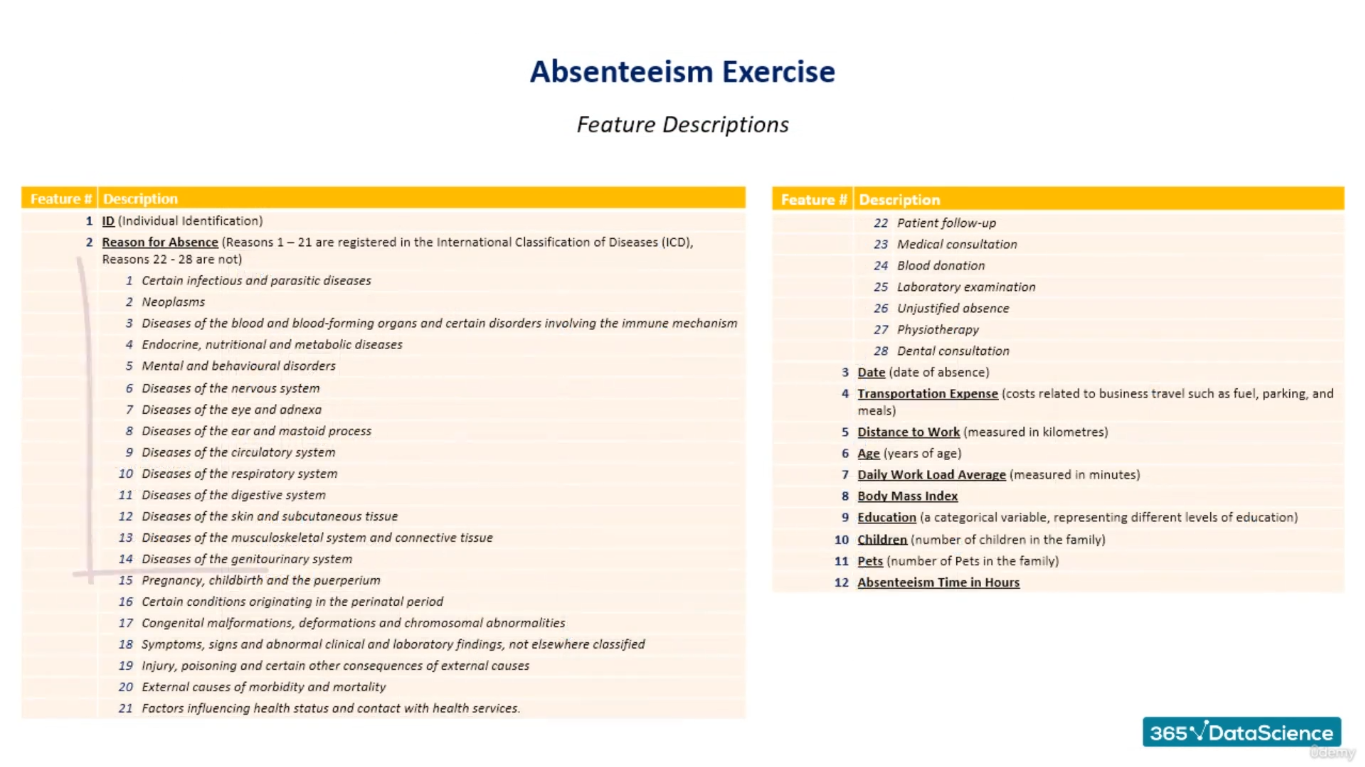

In [36]:
from google.colab import files
from IPython import display

uploaded = files.upload()
display.Image('reason absenteeismfeature description.png', width=1000)

In [37]:
#the point that we need to relize is that, this columns neither represented a nominal numeric, nor the continous as well. 
#each values, represented a categorical of particular reason for absence
#moreover, this variable, consist a lot of values or more precisely "high cardinality"
#now we'll aggregaring or categorize them based on similarity
data2 = checkpoint1.copy()
np.array(sorted(data2['Reason for Absence'].unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

In [38]:
data_reason = pd.get_dummies(data2['Reason for Absence'], drop_first=True)

In [39]:
pd.options.display.max_columns=None

In [40]:
data_reason.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [41]:
reason1 = data_reason.loc[:,1:14].sum(axis=1)
reason2 = data_reason.loc[:,15:17].sum(axis=1)
reason3 = data_reason.loc[:,18:21].sum(axis=1)
reason4 = data_reason.loc[:,22:].sum(axis=1)

In [42]:
reason = pd.concat([reason1, reason2, reason3, reason4], axis=1)

In [43]:
reason.head()

,0,1,2,3
0,0,0,0,1
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [44]:
reason.columns = ['reason1', 'reason2', 'reason3', 'reason4']

In [45]:
reason.head()

,reason1,reason2,reason3,reason4
0,0,0,0,1
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [46]:
data_reason_preprocessed = pd.concat([reason, data2.drop(['Reason for Absence'], axis=1)], axis=1)

In [47]:
data_reason_preprocessed.head(3)

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,0,0,1,0
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,0,0,1,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,0,0,0,1


In [48]:
data_reason_preprocessed.describe(include='all')

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.251820,0.008734,0.090247,0.596798,222.550218,29.985444,36.379913,271.847194,26.707424,1.282387,1.014556,0.688501,6.791849,0.205240,0.173217,0.205240,0.224163
std,0.434374,0.093113,0.286745,0.490898,66.417686,14.854977,6.347544,40.363950,4.238549,0.667025,1.111728,1.172659,12.765731,0.404171,0.378710,0.404171,0.417334
min,0.000000,0.000000,0.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000,1.000000,1.000000,1.000000,1.000000


####re-positioning the target column

In [49]:
data_reason_preprocessed.head(3)

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,0,0,1,0
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,0,0,1,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,0,0,0,1


In [50]:
data_reason_preprocessed.columns

Index(['reason1', 'reason2', 'reason3', 'reason4', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
       'weekday_monday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [51]:
move_column = data_reason_preprocessed.pop('Absenteeism Time in Hours')

In [52]:
data_reason_preprocessed.insert(data_reason_preprocessed.shape[1], 'Absenteeism Time in Hours', move_column)
#repositioning the column to the end of left of table

In [53]:
data_reason_preprocessed.head()

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,Absenteeism Time in Hours
0,0,0,0,1,289,36,33,239.554,30,1,2,1,0,0,1,0,4
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,0,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,0,0,0,1,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,0,1,0,0,4
4,0,0,0,1,289,36,33,239.554,30,1,2,1,0,1,0,0,2


In [54]:
#now the target variable has already positioned in the last of left order on data's columns

In [55]:
checkpoint2 = data_reason_preprocessed.copy()

###Standardizing the numerical continous or nominal ordinal

In [56]:
data_standard_process = checkpoint2.copy()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_standard_process.iloc[:,4:12])
data_standard_process.iloc[:,4:12] = scaler.transform(data_standard_process.iloc[:,4:12])

In [58]:
data_standard_process.head(2)

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,Absenteeism Time in Hours
0,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,0,1,0,4
1,0,0,0,0,-1.575279,-1.144251,2.147289,-0.800633,1.013485,-0.423662,-0.013103,-0.587555,0,0,1,0,0


In [59]:
#we need to let the dummie variables on its scale, because we going to keep the values, intepretable intuitively  

In [60]:
checkpoint3 = data_standard_process.copy()

##preprocessing the target variable

In [61]:
target_preprocess = checkpoint3.copy()

In [62]:
target_preprocess['Absenteeism Time in Hours'].head(10)

0     4
1     0
2     2
3     4
4     2
5     2
6     8
7     4
8    40
9     8
Name: Absenteeism Time in Hours, dtype: int64

In [63]:
#rather than barely predicting the target with its currently scale, we going to convert the values on target's column into label, so we can predict and intepreting intuitively
#we need to split the entire values, into two categories. both are 0 and 1 which are exessive absence rate
#each values higher the median value, are categorize as 1, otherwise the value below the median, will categorize as 0

med = target_preprocess['Absenteeism Time in Hours'].median()
target_categorize = np.where(target_preprocess['Absenteeism Time in Hours'] > 3,1,0)

In [64]:
target_categorize

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [65]:
target_preprocess['exessive_absence'] = target_categorize
target_preprocess = target_preprocess.drop(['Absenteeism Time in Hours'], axis=1)
target_preprocess

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,exessive_absence
0,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,0,1,0,1
1,0,0,0,0,-1.575279,-1.144251,2.147289,-0.800633,1.013485,-0.423662,-0.013103,-0.587555,0,0,1,0,0
2,0,0,0,1,-0.656180,1.415678,0.255417,-0.800633,1.013485,-0.423662,-0.913259,-0.587555,0,0,0,1,0
3,1,0,0,0,0.850540,-1.683183,0.413073,-0.800633,-0.639227,-0.423662,0.887053,-0.587555,0,1,0,0,1
4,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.656180,-0.537952,0.570729,-0.847690,-1.111431,1.076625,0.887053,-0.587555,0,0,0,1,1
696,1,0,0,0,0.036911,-0.268486,-1.321144,-0.847690,-0.639227,-0.423662,-0.013103,1.119212,0,0,0,1,0
697,1,0,0,0,1.618967,-0.942151,-1.321144,-0.847690,-0.403126,1.076625,-0.913259,-0.587555,0,1,0,0,1
698,0,0,0,1,0.187583,-0.942151,-0.690520,-0.847690,-0.403126,2.576911,-0.913259,-0.587555,0,1,0,0,0


####checking the balance of target


In [66]:
target_preprocess['exessive_absence'].sum()/len(target_preprocess['exessive_absence'])

0.4570596797671033

In [67]:
#our target is quite balanced in term of distribution.
#it is valid for us to assuming that our data target is quite balanced
#the balance value around 0.45 , 0.5, 0.55 are good for further process.

In [68]:
checkpoint4 = target_preprocess.copy()

##**Splitting Data**

####splitting data into input data and target data

In [69]:
splitted_data = checkpoint4.copy()
splitted_data.head()

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,exessive_absence
0,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,0,1,0,1
1,0,0,0,0,-1.575279,-1.144251,2.147289,-0.800633,1.013485,-0.423662,-0.013103,-0.587555,0,0,1,0,0
2,0,0,0,1,-0.656180,1.415678,0.255417,-0.800633,1.013485,-0.423662,-0.913259,-0.587555,0,0,0,1,0
3,1,0,0,0,0.850540,-1.683183,0.413073,-0.800633,-0.639227,-0.423662,0.887053,-0.587555,0,1,0,0,1
4,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,1,0,0,0


In [70]:
input_data = splitted_data.iloc[:,:-1].values
target_data = splitted_data.iloc[:,-1].values

In [71]:
splitted_data.iloc[:,:-1]

,reason1,reason2,reason3,reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,0,1,0
1,0,0,0,0,-1.575279,-1.144251,2.147289,-0.800633,1.013485,-0.423662,-0.013103,-0.587555,0,0,1,0
2,0,0,0,1,-0.656180,1.415678,0.255417,-0.800633,1.013485,-0.423662,-0.913259,-0.587555,0,0,0,1
3,1,0,0,0,0.850540,-1.683183,0.413073,-0.800633,-0.639227,-0.423662,0.887053,-0.587555,0,1,0,0
4,0,0,0,1,1.001212,0.405180,-0.532864,-0.800633,0.777383,-0.423662,0.887053,0.265828,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.656180,-0.537952,0.570729,-0.847690,-1.111431,1.076625,0.887053,-0.587555,0,0,0,1
696,1,0,0,0,0.036911,-0.268486,-1.321144,-0.847690,-0.639227,-0.423662,-0.013103,1.119212,0,0,0,1
697,1,0,0,0,1.618967,-0.942151,-1.321144,-0.847690,-0.403126,1.076625,-0.913259,-0.587555,0,1,0,0
698,0,0,0,1,0.187583,-0.942151,-0.690520,-0.847690,-0.403126,2.576911,-0.913259,-0.587555,0,1,0,0


In [72]:
input_data.shape

(687, 16)

In [73]:
target_data.shape

(687,)

####splitting into train, test, split

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state = 20)

In [75]:
print(x_train.shape, x_test.shape)

(549, 16) (138, 16)


In [76]:
print(y_train.shape, y_test.shape)

(549,) (138,)


##**Training the model**

####training the logistic regression model

In [77]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

####evaluating the model

In [78]:
regressor.score(x_train, y_train)

0.7832422586520947

In [79]:
regressor.score(x_test, y_test)

0.7753623188405797

In [80]:
regressor.intercept_

array([-1.43414332])

In [81]:
regressor.coef_.shape

(1, 16)

In [82]:
input_features = splitted_data.iloc[:,:-1]

In [83]:
evaluation_table = pd.DataFrame()
evaluation_table['feature'] = input_features.columns.values
evaluation_table['intercept'] = regressor.coef_.reshape(-1,1)
evaluation_table['odd'] = np.exp(evaluation_table.intercept.values)
evaluation_table = evaluation_table.sort_values(by=['intercept'], ascending=False)
evaluation_table
#the intercept has gives us enough of intrepretation about the significance of features, ranging from -0.3 to 2.7
#but it will be better if we altering the value into an intuitive value, wich is consist only a positive amount of value
#in the intercept features, the value close to 0 is insignificant
#similary, in the odd features, the closer to the 1, is insignificant

,feature,intercept,odd
2,reason3,2.784340,16.189131
0,reason1,2.552731,12.842126
3,reason4,0.689674,1.993066
4,Transportation Expense,0.659854,1.934509
1,reason2,0.628811,1.875379
12,weekday_monday,0.452566,1.572341
10,Children,0.418995,1.520433
8,Body Mass Index,0.281543,1.325173
14,weekday_tuesday,0.118177,1.125443
5,Distance to Work,-0.003714,0.996293


In [84]:
#through evaluation_tabel, we know that the variable/features education and distance to work, almost have no significance at all
#honestly, i'm surprice to, but our data have told us the truth....
#for the intercept, the closer the values to zero, the closer that values to unsignificancy, and vice versa
#for the odd, the closer each value either to 0 or 1, the closer that value to the unsignificancy

In [85]:
import pickle

In [86]:
with open('Model_portofolio', 'wb') as file:
  pickle.dump(regressor, file)

In [87]:
with open('Scaler_portofolio', 'wb') as file:
  pickle.dump(scaler, file)